In [1]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('modeling_ready.csv')
df.set_index('date',inplace=True)
df.head()

,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,,
2006-01-01,121900,113900,8000,6.5,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,6.8,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,6.4,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,6.3,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,6.2,2070,0,0,0,1017.0


In [3]:
df.drop('UR',axis=1,inplace=True)

In [4]:
df.head()

,Labor Force,Employed,Unemployed,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,
2006-01-01,121900,113900,8000,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,2070,0,0,0,1017.0


In [5]:
mod=ARMA(df.ctatl_differicnced1.dropna(),order=(1,1,0))
result=mod.fit()
result.summary()



C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     ctatl_differicnced1   No. Observations:                  180
Model:                      ARMA(1, 1)   Log Likelihood               -1265.268
Method:                        css-mle   S.D. of innovations            270.694
Date:                 Mon, 12 Jul 2021   AIC                           2538.535
Time:                         18:17:54   BIC                           2551.307
Sample:                     02-01-2006   HQIC                          2543.713
                          - 01-01-2021                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.8011      1.373     -4.227      0.000      -8.491      -3.111
ar.L1.ctatl_differicnced1     0.7315      0.054     13.485      0.000       0.625       0.838
ma.L1.ctatl_differicnced1    -1.0000      0.016    -61.051      0.000      -1.032      -0.968
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3670           +0.0000j            1.3670            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524:

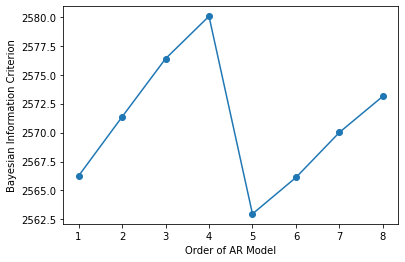

In [39]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(9)
for p in range(9):
    mod = ARMA(df.ctatl_differicnced1.dropna(), order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,9), BIC[1:9], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# AIC

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

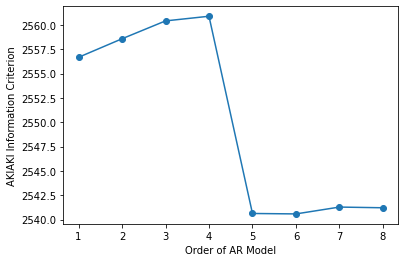

In [40]:
AIC = np.zeros(9)
for p in range(9):
    mod = ARMA(df.ctatl_differicnced1.dropna(), order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    AIC[p] = res.aic
    
# Plot the BIC as a function of p
plt.plot(range(1,9), AIC[1:9], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('AKIAKI Information Criterion')
plt.show()

In [121]:

# Creating empty list to store search results
order_aic_bic=[]

# Looping over p values 
for p in range(7):
  # Looping over q values 
    for q in range(7):
      	# creating and fiting ARMA(p,q) model
        model = SARIMAX(X_train, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC').head())

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC').head())


C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524:

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: Converg

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

    p  q          AIC          BIC
19  2  5  2035.415469  2059.173976
39  5  4  2035.990055  2065.688188
33  4  5  2036.069851  2065.767984
26  3  5  2036.229236  2062.957556
40  5  5  2037.468711  2070.136657
    p  q          AIC          BIC
19  2  5  2035.415469  2059.173976
5   0  5  2042.075562  2059.894442
8   1  1  2051.302099  2060.211538
18  2  4  2041.002590  2061.791283
12  1  5  2041.324032  2062.112726


C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


it seems that the order for our model should be 5 

In [113]:

training= df.ctatl_differicnced1.dropna()
X_train=training['2006-01-01':'2018-01-01']
X_test=training['2018-01-01':'2021-01-01']


# Arima testing 

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

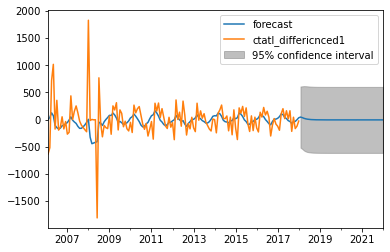

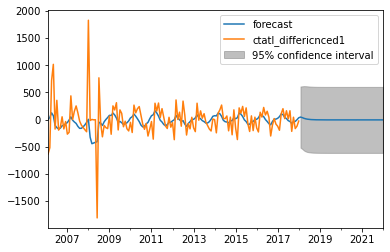

In [122]:
model=ARMA(X_train.dropna(),order=(2,1,5))
res=model.fit()
res.plot_predict(start=0,end='2022')

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

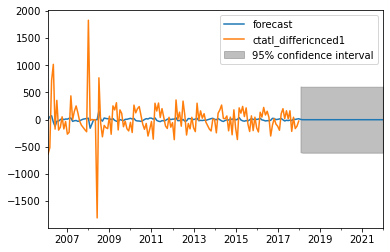

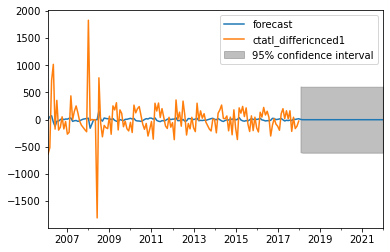

In [123]:
model=ARMA(X_train.dropna(),order=(2,0,5))
res=model.fit()
res.plot_predict(start=0,end='2022')

differenced data shows a spike in crime between 2021 and 2022 but the model fails to capture the Pandemic effect... yet in ordinary circumstances it only seems probable that the trend will continue to regress around the mean

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

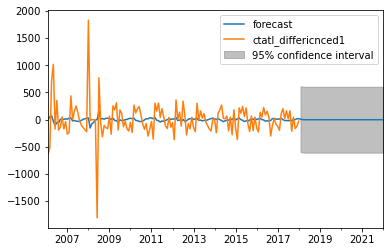

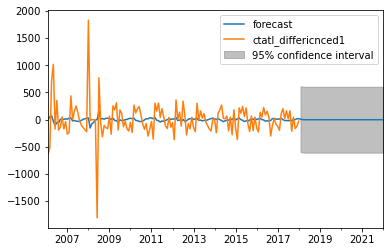

In [124]:
model=ARMA(X_train,order=(3,0,5))
res=model.fit()
res.plot_predict(start=0,end='2022')

In [287]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column]=(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
df_min_max_scaled.head()   


,Labor Force,Employed,Unemployed,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,
2006-01-01,0.842697,0.915254,0.144928,0.413601,0.0,0.0,0.0,NaN
2006-02-01,0.853933,0.912429,0.159420,0.218238,0.0,0.0,0.0,0.323432
2006-03-01,0.842697,0.920904,0.135266,0.058733,0.0,0.0,0.0,0.355336
2006-04-01,0.865169,0.935028,0.130435,0.280680,0.0,0.0,0.0,0.694719
2006-05-01,0.898876,0.951977,0.125604,0.595054,0.0,0.0,0.0,0.776953


In [289]:
df_min_max_scaled.lockdown=df_min_max_scaled.lockdown.astype(int)
df_min_max_scaled.e_stimulus=df_min_max_scaled.e_stimulus.astype(int)
df_min_max_scaled.unemployment_extension=df_min_max_scaled.unemployment_extension.astype(int)

In [290]:
df_min_max_scaled.drop(['Unemployed','ctotal'],axis=1,inplace=True)

In [291]:
dfmms=df_min_max_scaled.dropna()

In [292]:
y= df.ctatl_differicnced1.dropna()
x=dfmms.drop("ctatl_differicnced1",axis=1)

y_train=y['2006-01-01':'2017-01-01']
y_test=y['2017-01-01':'2020-01-01']
x_train=x['2006-01-01':'2017-01-01']
x_test=x['2017-01-01':'2019-12-01']

compare the real forcast to the unreal forcast using MSE as a method of evaluation 

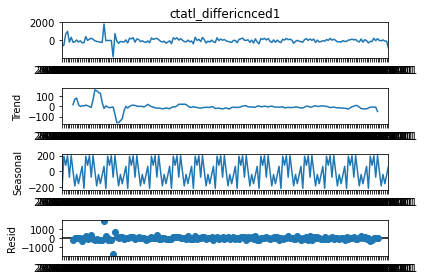

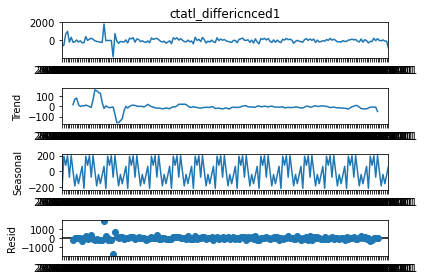

In [273]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_y=seasonal_decompose(y,period=12)
decomp_y.plot()

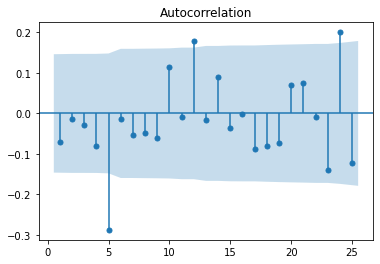

In [274]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(y, lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

It looks as if we need to try 5,12,24 as S parameters 

In [311]:
diff=df.ctatl_differicnced1.diff().diff(5).dropna()

In [312]:
diff

date
2006-08-01    -664.0
2006-09-01   -1181.0
2006-10-01    -107.0
2006-11-01     967.0
2006-12-01    -392.0
               ...  
2020-09-01      -9.0
2020-10-01    -274.0
2020-11-01     151.0
2020-12-01    -248.0
2021-01-01    -602.0
Name: ctatl_differicnced1, Length: 174, dtype: float64

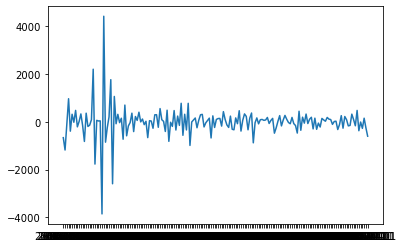

In [313]:
plt.plot(diff)

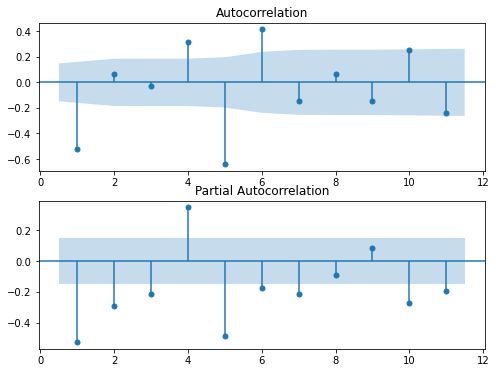

In [315]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(diff,lags=11,zero=False, ax=ax1)

plot_pacf(diff,lags=11,zero=False, ax=ax2)

plt.show()

ar5 , MA 4 

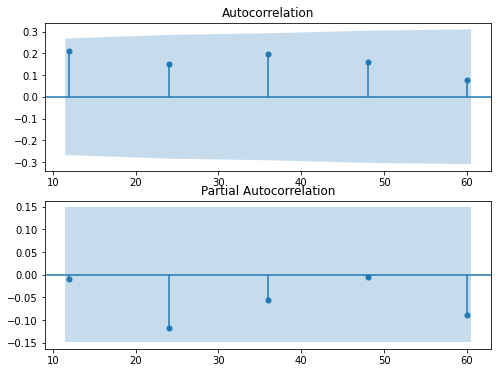

In [316]:
lags = [12, 24, 36, 48, 60]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

plot_acf(diff, lags=lags, ax=ax1)

plot_pacf(diff, lags=lags, ax=ax2)

plt.show()

In [ ]:
P 0, D 0 ,Q 0  ,S 12

In [325]:
mod=SARIMAX(diff,order=(3,0,5),seasonal_order=(0,1,1,12))
ress=mod.fit()
preds=ress.predict(start=0,end='2023')


C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [326]:
ress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                  ctatl_differicnced1   No. Observations:                  174
Model:             SARIMAX(3, 0, 5)x(0, 1, [1], 12)   Log Likelihood               -1173.169
Date:                              Fri, 16 Jul 2021   AIC                           2366.338
Time:                                      15:03:49   BIC                           2397.214
Sample:                                  08-01-2006   HQIC                          2378.875
                                       - 01-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9715      0.072    -13.424      0.000      -1.113      -0.830
ar.L2         -0.7453      0.100     -7.437      0.000      -0.942      -0.549
ar.L3         -0.3875      0.093     -4.179      0.000      -0.569      -0.206
ma.L1          0.2212      0.588      0.376      0.707      -0.931       1.373
ma.L2          0.0495      0.536      0.092      0.926      -1.002       1.101
ma.L3         -0.0364      0.564     -0.065      0.949      -1.142       1.069
ma.L4         -0.2120      0.607     -0.350      0.727      -1.401       0.977
ma.L5         -0.9557      0.443     -2.159      0.031      -1.823      -0.088
ma.S.L12      -0.7888      0.149     -5.286      0.000      -1.081      -0.496
sigma2      1.336e+05   5.16e+04      2.587      0.010    3.24e+04    2.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              1030.54
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

the q probability seems rather high , randomess seems rather High 

In [ ]:
# the model is giving standard error of 0.067 with S 36 

Text(0.5, 1.0, 'Sarimax seasonal moving average')

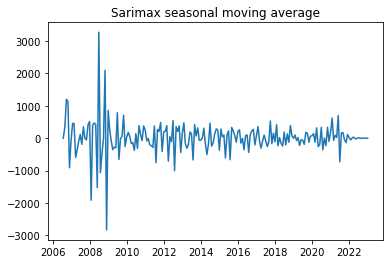

In [324]:
plt.plot(preds)
plt.title('Sarimax seasonal moving average')

In [335]:
y= diff
x=dfmms.drop("ctatl_differicnced1",axis=1)

y_train=y['2006-08-01':'2021-01-01']
y_test=y['2017-01-01':'2020-01-01']
x_train=x['2006-08-01':'2021-01-01']
x_test=x['2017-01-01':'2019-12-01']

# testing Sarimax with arima parameters and regressors 


In [336]:
modr=SARIMAX(y_train,exog=x_train,order=(3,0,5),seasonal_order=(3,0,5,12),time_varying_regression=False)
ressr=modr.fit()
ressr.summary()

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                ctatl_differicnced1   No. Observations:                  174
Model:             SARIMAX(3, 0, 5)x(3, 0, 5, 12)   Log Likelihood               -1255.895
Date:                            Fri, 16 Jul 2021   AIC                           2555.791
Time:                                    19:32:52   BIC                           2625.290
Sample:                                08-01-2006   HQIC                          2583.984
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Labor Force              -48.0491     74.186     -0.648      0.517    -193.451      97.353
Employed                  10.9742     67.147      0.163      0.870    -120.631     142.579
lockdown                 -55.7156     27.533     -2.024      0.043    -109.679      -1.752
e_stimulus               262.7327    176.591      1.488      0.137     -83.380     608.845
unemployment_extension   -55.7156     27.533     -2.024      0.043    -109.680      -1.751
ar.L1                     -0.8054      0.124     -6.502      0.000      -1.048      -0.563
ar.L2                     -0.5815      0.171     -3.391      0.001      -0.918      -0.245
ar.L3                     -0.1611      0.168     -0.961      0.337      -0.490       0.167
ma.L1                      0.1480      0.467      0.317      0.751      -0.767       1.064
ma.L2                      0.1518      0.715      0.212      0.832      -1.250       1.554
ma.L3                      0.0138      0.707      0.020      0.984      -1.372       1.400
ma.L4                      0.0020      0.411      0.005      0.996      -0.804       0.808
ma.L5                     -0.9184      0.883     -1.041      0.298      -2.648       0.811
ar.S.L12                   0.0869      9.261      0.009      0.993     -18.065      18.239
ar.S.L24                   0.5387      1.141      0.472      0.637      -1.697       2.775
ar.S.L36                   0.0559      5.809      0.010      0.992     -11.330      11.441
ma.S.L12                  -0.0434      9.245     -0.005      0.996     -18.164      18.077
ma.S.L24                  -0.3876      1.187     -0.327      0.744      -2.714       1.939
ma.S.L36                   0.1610      4.404      0.037      0.971      -8.470       8.792
ma.S.L48                   0.2260      2.123      0.106      0.915      -3.935       4.387
ma.S.L60                  -0.0322      2.198     -0.015      0.988      -4.339       4.275
sigma2                  1.127e+05   1.04e+05      1.080      0.280   -9.18e+04    3.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):              1323.82
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+22. Standard errors may be unstable.
"""

Text(0.5, 1.0, 'Sarimax with Exogs')

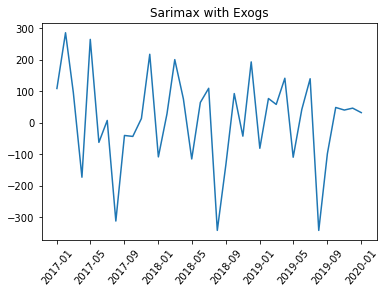

In [337]:
predss=ressr.predict(start='01-01-2017',end='01-01-2020',exog=x_test,dynamic=True)
ax1=plt.plot(predss)
plt.xticks(rotation=50)
plt.title('Sarimax with Exogs')

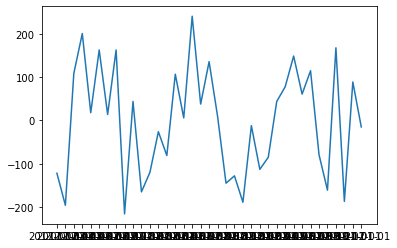

In [295]:
plt.plot(df.ctatl_differicnced1['2017-01-01':'2020-01-01'])

In [340]:
y= df.ctotal
x=dfmms.drop("ctatl_differicnced1",axis=1)

y_train=y['2006-08-01':'2017-01-01']
y_test=y['2017-01-01':'2020-01-01']
x_train=x['2006-08-01':'2017-01-01']
x_test=x['2017-01-01':'2019-12-01']

In [343]:
modr=SARIMAX(y_train,exog=x_train,order=(3,0,5),seasonal_order=(3,0,5,12),time_varying_regression=True,mle_regression=False)
ressr=modr.fit()
ressr.summary()

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             ctotal   No. Observations:                  126
Model:             SARIMAX(3, 0, 5)x(3, 0, 5, 12)   Log Likelihood                -841.257
Date:                            Fri, 16 Jul 2021   AIC                           1726.513
Time:                                    19:40:04   BIC                           1788.021
Sample:                                08-01-2006   HQIC                          1751.494
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
ar.L1                          0.6356      0.159      3.991      0.000       0.323       0.948
ar.L2                          0.0921      0.188      0.490      0.624      -0.277       0.461
ar.L3                          0.2607      0.146      1.790      0.074      -0.025       0.546
ma.L1                          0.1312      0.642      0.204      0.838      -1.128       1.390
ma.L2                          0.0990      1.957      0.051      0.960      -3.736       3.934
ma.L3                          0.1358      1.574      0.086      0.931      -2.949       3.221
ma.L4                         -0.3527      1.321     -0.267      0.790      -2.943       2.237
ma.L5                         -0.6976      1.720     -0.406      0.685      -4.068       2.673
ar.S.L12                       0.3320      5.215      0.064      0.949      -9.890      10.554
ar.S.L24                       0.8871      6.492      0.137      0.891     -11.837      13.612
ar.S.L36                      -0.3809      1.799     -0.212      0.832      -3.908       3.146
ma.S.L12                      -0.4479      6.269     -0.071      0.943     -12.735      11.839
ma.S.L24                      -0.6991      7.100     -0.098      0.922     -14.614      13.216
ma.S.L36                       0.5326      3.526      0.151      0.880      -6.378       7.444
ma.S.L48                       0.1356      1.235      0.110      0.913      -2.285       2.556
ma.S.L60                       0.2522      1.461      0.173      0.863      -2.611       3.116
var.Labor Force                1.0104   1.52e+04   6.66e-05      1.000   -2.97e+04    2.97e+04
var.Employed                   1.0067   1.78e+04   5.66e-05      1.000   -3.49e+04    3.49e+04
var.lockdown                   1.0000   3329.325      0.000      1.000   -6524.358    6526.358
var.e_stimulus                 1.0000   3329.325      0.000      1.000   -6524.358    6526.358
var.unemployment_extension     1.0000   3329.325      0.000      1.000   -6524.358    6526.358
sigma2                      3.522e+04     26.634   1322.283      0.000    3.52e+04    3.53e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2132.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             2.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.5e+22. Standard errors may be unstable.
"""

Text(0.5, 1.0, 'Sarimax with Exogs')

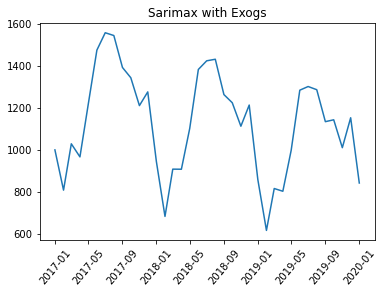

In [346]:
predss=ressr.predict(start='01-01-2017',end='01-01-2020',exog=x_test,dynamic=True)
ax1=plt.plot(predss)

plt.xticks(rotation=50)
plt.title('Sarimax with Exogs')


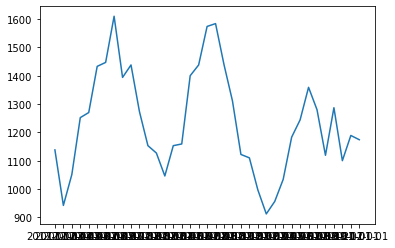

In [347]:
plt.plot(y_test)

In [349]:
import pmdarima as pm 
results=pm.auto_arima(y)

ModuleNotFoundError: No module named 'pmdarima'